<a href="https://colab.research.google.com/github/teja-1403/Game-of-Thrones-Analysis/blob/main/GOT_Character_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Character Death Predictions**

# **1. DATASET OVERVIEW**

In [1]:
# Loading required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving character-predictions.csv to character-predictions.csv


In [3]:
data = pd.read_csv('character-predictions.csv')
print(data)

      S.No  actual  pred  alive   plod                  name  \
0        1       0     0  0.054  0.946  Viserys II Targaryen   
1        2       1     0  0.387  0.613           Walder Frey   
2        3       1     0  0.493  0.507          Addison Hill   
3        4       0     0  0.076  0.924           Aemma Arryn   
4        5       1     1  0.617  0.383        Sylva Santagar   
...    ...     ...   ...    ...    ...                   ...   
1941  1942       0     1  0.803  0.197                 Luwin   
1942  1943       0     1  0.987  0.013                  Reek   
1943  1944       1     1  0.520  0.480      Symeon Star-Eyes   
1944  1945       1     1  0.637  0.363             Coldhands   
1945  1946       0     0  0.093  0.907       Tytos Lannister   

                     title  male   culture  dateOfBirth  ...  isAliveHeir  \
0                      NaN     1       NaN          NaN  ...          0.0   
1     Lord of the Crossing     1  Rivermen        208.0  ...          NaN   


In [4]:
data.head().T

,0,1,2,3,4
S.No,1,2,3,4,5
actual,0,1,1,0,1
pred,0,0,0,0,1
alive,0.054,0.387,0.493,0.076,0.617
plod,0.946,0.613,0.507,0.924,0.383
name,Viserys II Targaryen,Walder Frey,Addison Hill,Aemma Arryn,Sylva Santagar
title,NaN,Lord of the Crossing,Ser,Queen,Greenstone
male,1,1,1,0,0
culture,NaN,Rivermen,NaN,NaN,Dornish
dateOfBirth,NaN,208.0,NaN,82.0,276.0


In [5]:
data.shape

(1946, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,1946.0,973.500000,561.906131,1.0,487.250000,973.500000,1459.750000,1946.0
actual,1946.0,0.745632,0.435617,0.0,0.000000,1.000000,1.000000,1.0
pred,1946.0,0.687050,0.463813,0.0,0.000000,1.000000,1.000000,1.0
alive,1946.0,0.634470,0.312637,0.0,0.391250,0.735500,0.899000,1.0
plod,1946.0,0.365530,0.312637,0.0,0.101000,0.264500,0.608750,1.0
male,1946.0,0.619219,0.485704,0.0,0.000000,1.000000,1.000000,1.0
dateOfBirth,433.0,1577.364896,19565.414460,-28.0,240.000000,268.000000,285.000000,298299.0
DateoFdeath,444.0,2950.193694,28192.245529,0.0,282.000000,299.000000,299.000000,298299.0
book1,1946.0,0.198356,0.398864,0.0,0.000000,0.000000,0.000000,1.0
book2,1946.0,0.374615,0.484148,0.0,0.000000,0.000000,1.000000,1.0


In [8]:
data.isnull().sum()

,0
S.No,0
actual,0
pred,0
alive,0
plod,0
name,0
title,1008
male,0
culture,1269
dateOfBirth,1513


In [9]:
data.duplicated().sum()

0

# **2. Data Cleansing**


- Culture Induction: Integrate similar culture into one single value.

- Drop: Drop data worthless for prediction like "name","dataOfBirth".
- Factorization: Transform discrete data like "title","mother","culture" into numerical data.

- Fill NaN:Fill null value with -1.

In [10]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Function to map culture
def get_cult(value):
    value = value.lower()
    v = [k for k, v_list in cult.items() if value in v_list]
    return v[0] if len(v) > 0 else value.title()

data['culture'] = data['culture'].fillna("").apply(get_cult)

# Dropping unnecessary columns
data.drop(["name", "alive", "pred", "plod", "isAlive", "dateOfBirth", "DateoFdeath"], axis=1, inplace=True)

# Factorizing categorical columns
data['title'] = pd.factorize(data['title'])[0]
data['culture'] = pd.factorize(data['culture'])[0]
data['mother'] = pd.factorize(data['mother'])[0]
data['father'] = pd.factorize(data['father'])[0]
data['heir'] = pd.factorize(data['heir'])[0]
data['house'] = pd.factorize(data['house'])[0]
data['spouse'] = pd.factorize(data['spouse'])[0]

# Filling NaN values with -1
data.fillna(value=-1, inplace=True)

# Extract target variable
Y = data['actual'].values

# Keep a copy of the original data
Odata = data.copy(deep=True)

# Drop the target column from the dataset
data.drop(['actual'], axis=1, inplace=True)

# **3. Feature Correlation**

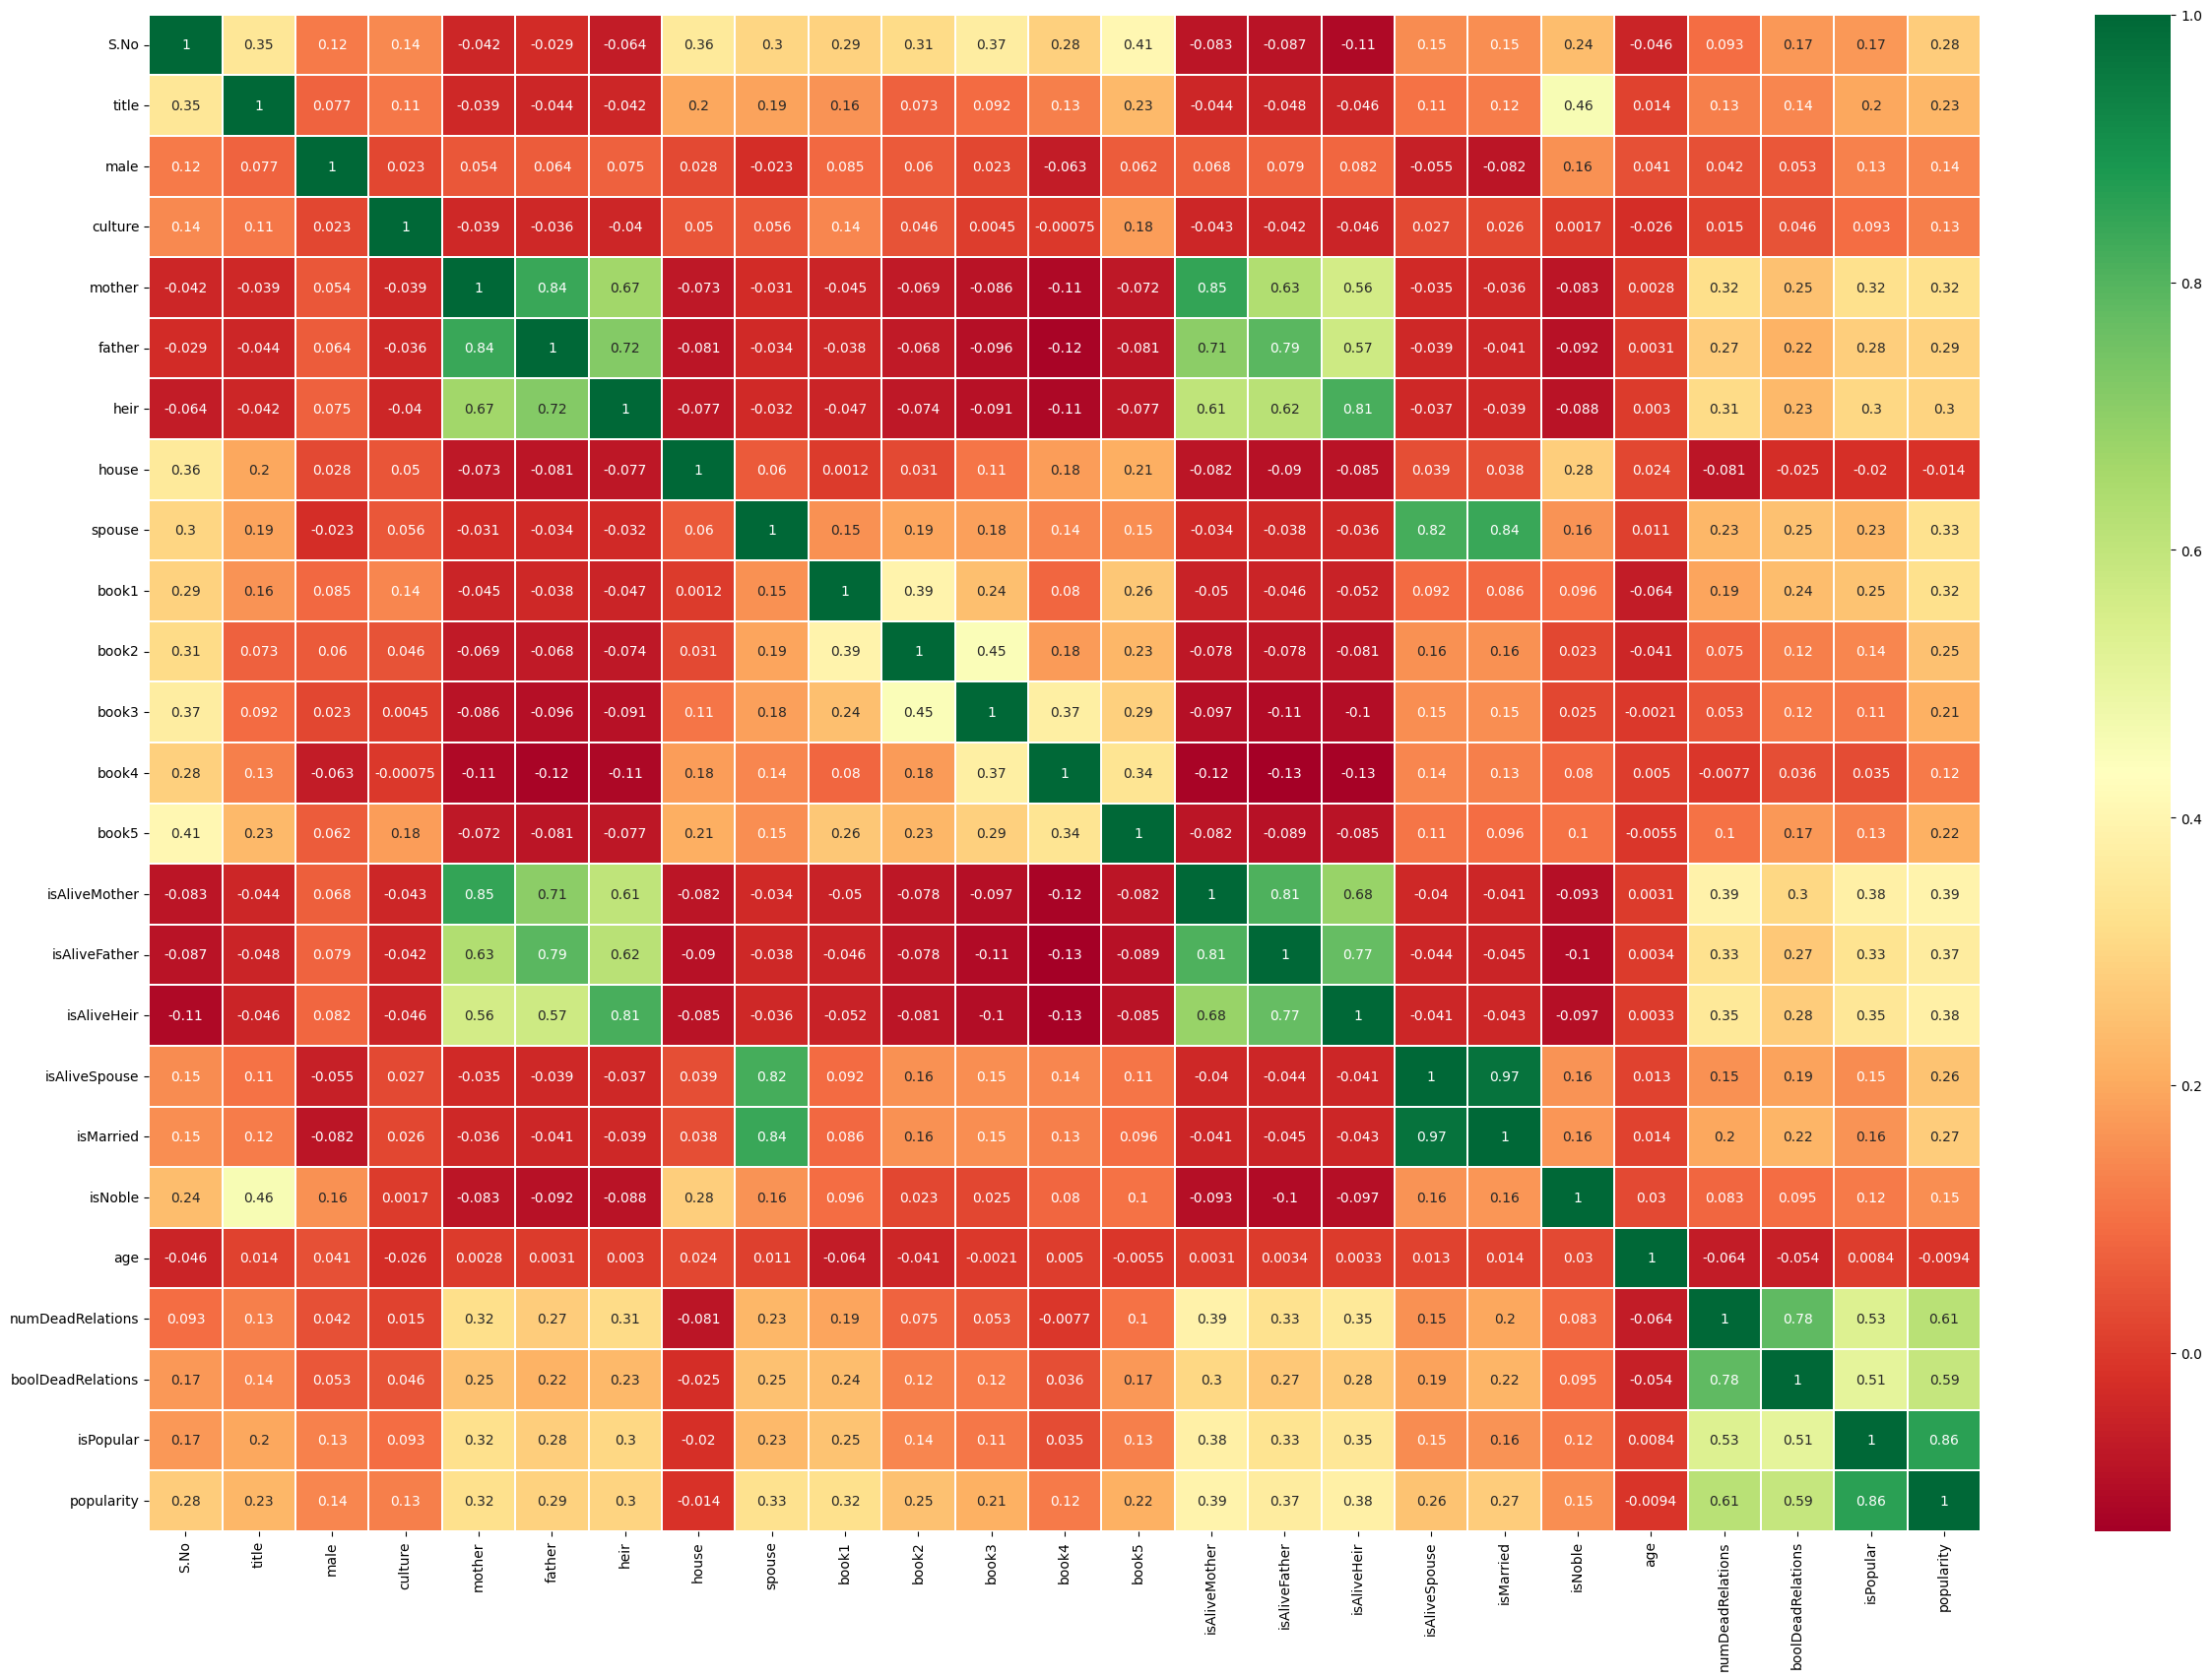

In [12]:
# Create a heatmap for the correlation matrix
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

# **4. Prediction**

Predicting the death of characters by creating 10 different models of Machine Learning

1. RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Drop the "S.No" column from the dataset
data.drop(["S.No"], axis=1, inplace=True)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
random_forest.fit(data, Y)

# Evaluate the model accuracy on the training data
print('RandomForest Accuracy:\n', random_forest.score(data, Y))

RandomForest Accuracy:
 0.9922918807810894


2. DecisionTree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=42)

# Fit the model to the data
DT.fit(data, Y)

# Evaluate the model accuracy on the training data
print('DecisionTree Accuracy:\n', DT.score(data, Y))

DecisionTree Accuracy:
 0.9922918807810894


3. SVC

In [15]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svc = SVC()

# Fit the model to the data
svc.fit(data, Y)

# Evaluate the model accuracy on the training data
print('SVC Accuracy:\n', svc.score(data, Y))

SVC Accuracy:
 0.7466598150051388


4. LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
LR = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the data
LR.fit(data, Y)

# Evaluate the model accuracy on the training data
print('Logistic Regression Accuracy:\n', LR.score(data, Y))

Logistic Regression Accuracy:
 0.7723535457348407


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5. kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
knn.fit(data, Y)

# Evaluate the model accuracy on the training data
print('kNN Accuracy:\n', knn.score(data, Y))


kNN Accuracy:
 0.8525179856115108


6. Naive Bayes Gaussian

In [18]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gaussian = GaussianNB()

# Fit the model to the data
gaussian.fit(data, Y)

# Evaluate the model accuracy on the training data
print('Gaussian Naive Bayes Accuracy:\n', gaussian.score(data, Y))

Gaussian Naive Bayes Accuracy:
 0.7702980472764646


7. Logistic Regression with Cross Validation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define predictors
predictors = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']

# Initialize the Logistic Regression model
alg = LogisticRegression(random_state=1)

# Perform cross-validation with 3 folds
scores = cross_val_score(alg, Odata[predictors], Odata["actual"], cv=3)

# Print the cross-validation accuracy
print('Logistic Regression Cross-Validation Accuracy: \n', scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 
 0.7245453594323651


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8. Linear Regression with KFold

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Define predictors
predictors = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']

# Initialize Linear Regression model
alg = LinearRegression()

# Initialize KFold with 3 splits
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# List to store predictions
predictions = []

# Loop over KFold splits
for train, test in kf.split(Odata):
    # Train data
    train_predictors = Odata[predictors].iloc[train]
    train_target = Odata["actual"].iloc[train]

    # Fit the model
    alg.fit(train_predictors, train_target)

    # Make predictions on the test data
    test_predictions = alg.predict(Odata[predictors].iloc[test])
    predictions.append(test_predictions)

# Concatenate all predictions into one array
predictions = np.concatenate(predictions, axis=0)

# Convert predictions to binary (0 or 1)
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

# Calculate accuracy
accuracy = sum(predictions == Odata["actual"]) / len(predictions)

# Print accuracy
print('Linear Regression Accuracy:\n', accuracy)

Linear Regression Accuracy:
 0.7137718396711202


9. RandomForest with CrossValidation

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Define predictors
predictors = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']

# Initialize Random Forest Classifier
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=12, min_samples_leaf=1)

# Initialize KFold with 3 splits
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# Perform cross-validation with the KFold split
scores = cross_val_score(alg, Odata[predictors], Odata["actual"], cv=kf)

# Print the mean cross-validation score
print('Random Forest Cross-Validation Accuracy:\n', scores.mean())

Random Forest Cross-Validation Accuracy:
 0.8129513908704116


10. GradientBoosting

In [24]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

# Define the algorithms and their respective predictors
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3),
     ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']],
    [LogisticRegression(random_state=1),
     ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']]
]

# Initialize KFold with 3 splits
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# List to store predictions
predictions = []

# Loop over KFold splits
for train_idx, test_idx in kf.split(Odata):
    train_target = Odata["actual"].iloc[train_idx]
    full_test_predictions = []

    # Loop through each model and fit
    for alg, predictors in algorithms:
        # Fit the algorithm to the training data
        alg.fit(Odata[predictors].iloc[train_idx, :], train_target)

        # Get probability predictions for the positive class (class 1)
        test_predictions = alg.predict_proba(Odata[predictors].iloc[test_idx, :])[:, 1]

        # Append the predictions
        full_test_predictions.append(test_predictions)

    # Combine the predictions by averaging the probabilities
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2

    # Convert probabilities to binary outcomes based on the threshold of 0.5
    test_predictions[test_predictions <= 0.5] = 0
    test_predictions[test_predictions > 0.5] = 1

    # Store the final predictions
    predictions.append(test_predictions)

# Concatenate all predictions from the different folds
predictions = np.concatenate(predictions, axis=0)

# Calculate accuracy
accuracy = sum(predictions == Odata["actual"].values) / len(predictions)

# Print the accuracy
print('Gradient Boosting and Logistic Regression Accuracy:\n', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gradient Boosting and Logistic Regression Accuracy:
 0.7091469681397738


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagged KNN

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize the BaggingClassifier with KNN as the base estimator
model = BaggingClassifier(estimator=knn, random_state=0, n_estimators=700)

model.fit(data,Y)

# Perform 10-fold cross-validation and calculate the accuracy
result = cross_val_score(model, data, Y, cv=10, scoring='accuracy')

# Print the cross-validated accuracy score
print('The cross-validated score for bagged KNN is:', result.mean())

The cross-validated score for bagged KNN is: 0.7039439598202486


Bagged Decision Tree

In [30]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Initialize the BaggingClassifier with DecisionTree as the base estimator
model = BaggingClassifier(estimator=dt, random_state=0, n_estimators=100)

model.fit(data,Y)

# Perform 10-fold cross-validation and calculate the accuracy
result = cross_val_score(model, data, Y, cv=10, scoring='accuracy')

# Print the cross-validated accuracy score
print('The cross-validated score for bagged Decision Tree is:', result.mean())

The cross-validated score for bagged Decision Tree is: 0.7934126354744911


AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)

# Perform 10-fold cross-validation and calculate the accuracy
result = cross_val_score(ada, data, Y, cv=10, scoring='accuracy')

# Print the cross-validated accuracy score
print('The cross-validated score for AdaBoost is:', result.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

The cross-validated score for AdaBoost is: 0.7630504890298704


GradientBoost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)

# Perform 10-fold cross-validation and calculate the accuracy
result = cross_val_score(grad, data, Y, cv=10, scoring='accuracy')

# Print the cross-validated accuracy score
print('The cross-validated score for Gradient Boosting is:', result.mean())

The cross-validated score for Gradient Boosting is: 0.7403568596352101


XGBoost

In [35]:
import xgboost as xg

# Initialize the XGBoost model
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)

# Perform 10-fold cross-validation and calculate the accuracy
result = cross_val_score(xgboost, data, Y, cv=10, scoring='accuracy')

# Print the cross-validated accuracy score
print('The cross-validated score for XGBoost is:', result.mean())

The cross-validated score for XGBoost is: 0.7614961670631775


# **5. Plotting Feature Importance for Multiple Models**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


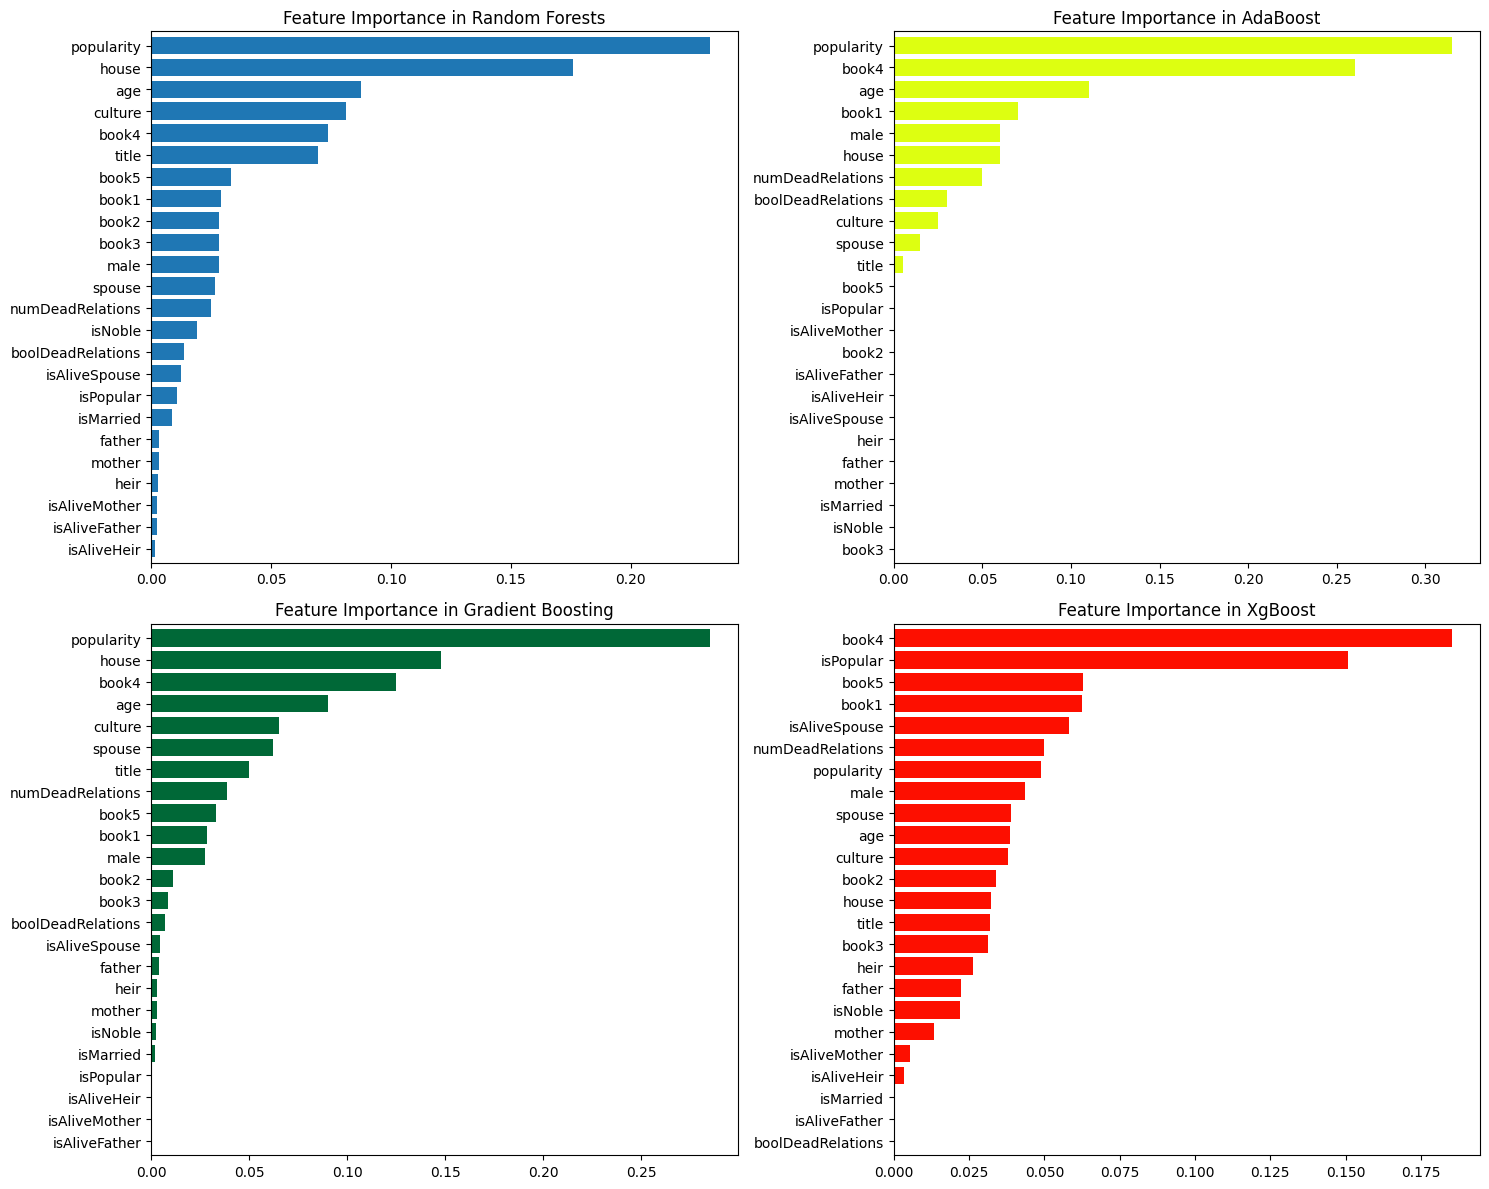

In [36]:
# Create a figure with subplots
f, ax = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest model
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(data, Y)
pd.Series(model.feature_importances_, data.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

# AdaBoost model
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(data, Y)
pd.Series(model.feature_importances_, data.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

# Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(data, Y)
pd.Series(model.feature_importances_, data.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

# XGBoost model
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(data, Y)
pd.Series(model.feature_importances_, data.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

# Show the plots
plt.tight_layout()
plt.show()

# **6. Confusion Matrix**

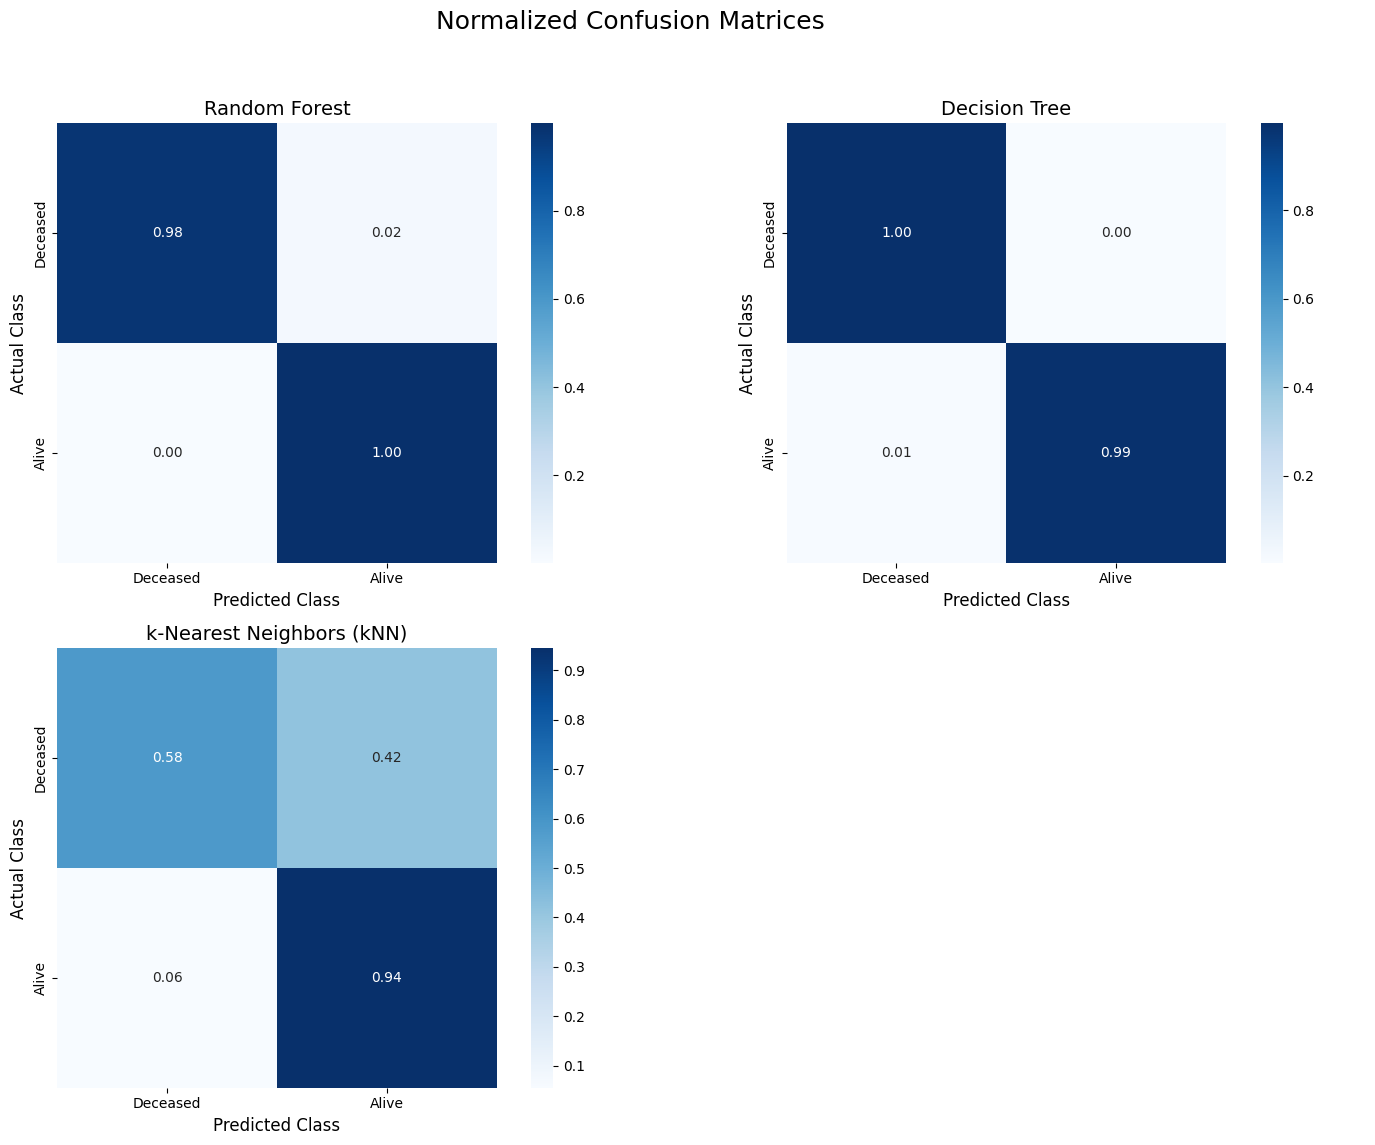

In [40]:
from sklearn.metrics import confusion_matrix

# Function to plot normalized confusion matrix
def make_cm(predictions, true_labels, title, axis):
    cm = confusion_matrix(true_labels, predictions)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by rows
    sns.heatmap(cm, square=True, annot=True, fmt='.2f', xticklabels=["Deceased", "Alive"],
                yticklabels=["Deceased", "Alive"], cbar=True, ax=axis, cmap="Blues")
    axis.set_title(title, fontsize=14)
    axis.set_xlabel("Predicted Class", fontsize=12)
    axis.set_ylabel("Actual Class", fontsize=12)

# True labels (Y)
true_labels = Y

# Predictions
random_forest.fit(data, Y)
preds_rf = random_forest.predict(data)

DT.fit(data, Y)
preds_dt = DT.predict(data)

knn.fit(data, Y)
preds_knn = knn.predict(data)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Normalized Confusion Matrices", fontsize=18)

# Random Forest
make_cm(preds_rf, true_labels, "Random Forest", axes[0, 0])

# Decision Tree
make_cm(preds_dt, true_labels, "Decision Tree", axes[0, 1])

# kNN
make_cm(preds_knn, true_labels, "k-Nearest Neighbors (kNN)", axes[1, 0])

# Remove unused subplot
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **7. Scorecard**

In [41]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, log_loss

# Generate predictions for each model
preds_rf = random_forest.predict_proba(data)  # Random Forest
preds_dt = DT.predict_proba(data)            # Decision Tree
preds_knn = knn.predict_proba(data)          # k-Nearest Neighbors

# Convert ground truth to binary
true_labels = Y

# Scorecard for Random Forest
print("Random Forest Performance\n" + "=" * 26 + "\n",
      classification_report(true_labels, np.argmax(preds_rf, axis=1), target_names=["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(true_labels, preds_rf[:, 1]))
print("Accuracy : %.4f" % accuracy_score(true_labels, np.argmax(preds_rf, axis=1)))
print("Log Loss : %.4f\n" % log_loss(true_labels, preds_rf[:, 1]))

# Scorecard for Decision Tree
print("Decision Tree Performance\n" + "=" * 27 + "\n",
      classification_report(true_labels, np.argmax(preds_dt, axis=1), target_names=["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(true_labels, preds_dt[:, 1]))
print("Accuracy : %.4f" % accuracy_score(true_labels, np.argmax(preds_dt, axis=1)))
print("Log Loss : %.4f\n" % log_loss(true_labels, preds_dt[:, 1]))

# Scorecard for k-Nearest Neighbors
print("k-Nearest Neighbors Performance\n" + "=" * 36 + "\n",
      classification_report(true_labels, np.argmax(preds_knn, axis=1), target_names=["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(true_labels, preds_knn[:, 1]))
print("Accuracy : %.4f" % accuracy_score(true_labels, np.argmax(preds_knn, axis=1)))
print("Log Loss : %.4f" % log_loss(true_labels, preds_knn[:, 1]))

Random Forest Performance
               precision    recall  f1-score   support

    Deceased       0.99      0.98      0.98       495
       Alive       0.99      1.00      0.99      1451

    accuracy                           0.99      1946
   macro avg       0.99      0.99      0.99      1946
weighted avg       0.99      0.99      0.99      1946

AUC      : 0.9996
Accuracy : 0.9923
Log Loss : 0.1093

Decision Tree Performance
               precision    recall  f1-score   support

    Deceased       0.97      1.00      0.99       495
       Alive       1.00      0.99      0.99      1451

    accuracy                           0.99      1946
   macro avg       0.99      0.99      0.99      1946
weighted avg       0.99      0.99      0.99      1946

AUC      : 0.9998
Accuracy : 0.9923
Log Loss : 0.0118

k-Nearest Neighbors Performance
               precision    recall  f1-score   support

    Deceased       0.78      0.58      0.67       495
       Alive       0.87      0.94      0